# 20152410 배형준 머신러닝 과제5

In [1]:
# library import

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# set my local working directory

import os

directory = 'C:\\Users\\golds\\Desktop\\중앙대학교\\2020-1 4학년 1학기\\머신러닝'
os.chdir(directory)

# 1. Plot the training data

In [3]:
# load dataset

train = pd.read_csv('./과제5/data.txt', header=None)
train.columns = ['x', 'y', 'l']

label_0 = train.loc[train['l'] == 0, :]
label_1 = train.loc[train['l'] == 1, :]

X = train[['x', 'y']]
Y = train['l']

In [4]:
train.head()

,x,y,l
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


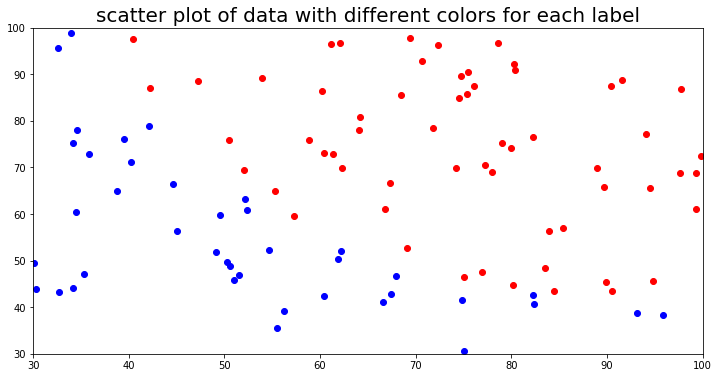

In [5]:
# scatter plot of data with different colors for each label

plt.figure(figsize=(12, 6))
plt.plot(label_0.x, label_0.y, 'bo')
plt.plot(label_1.x, label_1.y, 'ro')
plt.xlim((30, 100))
plt.ylim((30, 100))
plt.title('scatter plot of data with different colors for each label', fontsize=20)
plt.show()

파란 점과 빨간 점을 적당히 구분할 수 있는 선이 존재함을 시각적으로 확인할 수 있다. 다만 직선보다는 완만한 곡선이 두 그룹을 더 잘 구별할 수 있을 것 같다.

# 2. Plot the estimated parameters

In [6]:
def sigmoid(X, theta):
    value = 1 / (1 + np.exp(-X.dot(theta)))
    return value

In [7]:
def logistic_regression(X, Y):
    # 데이터 타입 정리
    m = len(Y)
    X = np.hstack((np.ones((m, 1)), X))
    Y = np.array(Y).reshape(-1, 1)
    
    # learning parameters
    learning_rate = np.array([0.03, 0.001, 0.001]).reshape(-1, 1)
    # 학습률을 똑같이 하니까 어떤건 발산하고 어떤건 수렴하길래 다르게 설정함
    error_bound = 10**(-6)
    critical_value = 0.5
    delta = 10**(-7) # 로그 안에 0이 들어가지 않게 하기 위해 설정

    # setting for learning
    temp_theta = np.random.randn(3, 1)
    temp_sigmoid = sigmoid(X, temp_theta)
    temp_loss = np.sum(-Y * np.log(temp_sigmoid + delta) - (1-Y) * np.log(1-temp_sigmoid + delta)) / m

    record_theta = temp_theta.T
    record_loss = [float(temp_loss)]
    
    # predict
    temp_predict = np.where(temp_sigmoid >= critical_value, 1, 0).reshape(-1, 1)
    record_accuracy = [np.mean(temp_predict == Y)]
    
    # model learning
    while True:
        # calculate gradient
        gradient = np.dot(X.T, temp_sigmoid - Y) / m
        
        # renew the parameters, calculate loss to evaluate the parameters
        temp_theta = temp_theta - learning_rate * gradient
        temp_sigmoid = sigmoid(X, temp_theta)
        temp_loss = np.sum(-Y * np.log(temp_sigmoid + delta) - (1-Y) * np.log(1-temp_sigmoid + delta)) / m
        
        # store results
        record_theta = np.vstack((record_theta, temp_theta.T))
        record_loss.append(float(temp_loss))
        temp_predict = np.where(temp_sigmoid >= critical_value, 1, 0).reshape(-1, 1)
        record_accuracy.append(np.mean(temp_predict == Y))

        # stopping rule
        if len(record_loss) > 200000 and record_loss[-2] - record_loss[-1] < error_bound:
            break
    
    result_theta = record_theta[-1, :]
    fitted_value = temp_predict
    
    return result_theta, fitted_value, record_theta, record_loss, record_accuracy

In [8]:
import time
start = time.time()
result_theta, fitted_value, record_theta, record_loss, record_accuracy = logistic_regression(X, Y)
print('학습하는데 걸린 시간은 {}초입니다.'.format(time.time() - start))

학습하는데 걸린 시간은 364.9826054573059초입니다.


In [9]:
print(' 학습 결과 출력 \n 최종 세타 값 : {} \n 최종 loss : {} \n 한 단계 반복에서 loss 감소량 : {} \n 최종 정확도 : {}'.format(
    result_theta, record_loss[-1], record_loss[-2] - record_loss[-1], record_accuracy[-1]))

 학습 결과 출력 
 최종 세타 값 : [-23.68640631   0.19443687   0.18953492] 
 최종 loss : 0.20383818139176335 
 한 단계 반복에서 loss 감소량 : 6.716718653487774e-09 
 최종 정확도 : 0.89


한 번 더 반복했을 때 loss 감소량이 충분히 작은 것으로 보아 loss가 수렴하여 모델 학습이 잘 된 것을 확인할 수 있다.

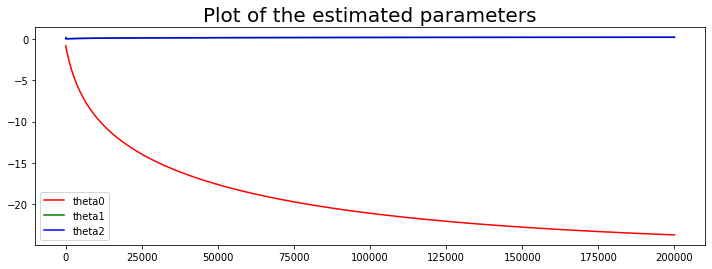

In [10]:
# plot the estimated parameters

plt.figure(figsize=(12, 4))
plt.plot(record_theta[:, 0], 'r', label='theta0')
plt.plot(record_theta[:, 1], 'g', label='theta1')
plt.plot(record_theta[:, 2], 'b', label='theta2')
plt.title('Plot of the estimated parameters', fontsize=20)
plt.legend(loc='best')
plt.show()

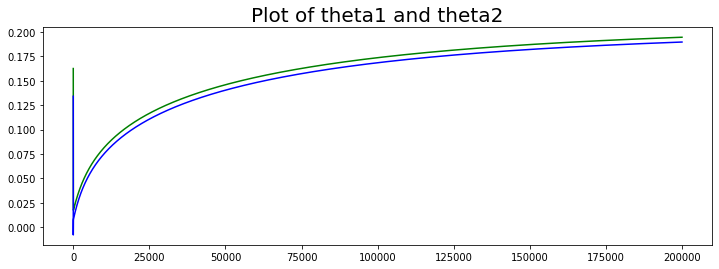

In [11]:
# y축의 범위가 달라서 잘 안보이길래 theta1, theta2만 따로 출력

plt.figure(figsize=(12, 4))
plt.plot(record_theta[:, 1], 'g', label='theta1')
plt.plot(record_theta[:, 2], 'b', label='theta2')
plt.title('Plot of theta1 and theta2', fontsize=20)
plt.show()

반복이 진행되면서 $\theta_0, \theta_1, \theta_2$ 모두 loss가 수렴함에 따라 적절한 값으로 수렴한 것을 그래프를 통해 확인할 수 있다.

# 3. Plot the training error

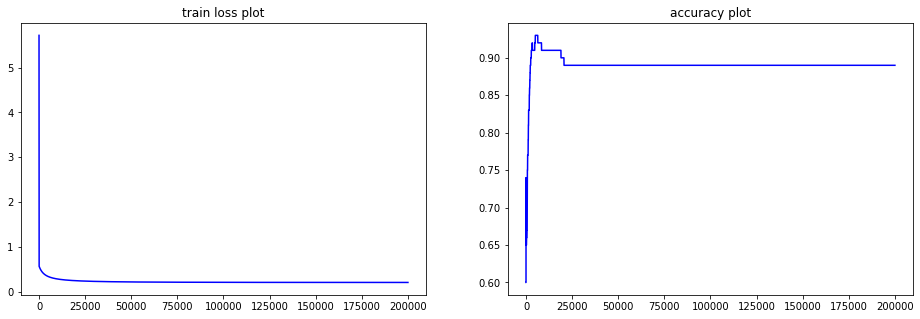

In [12]:
# 왼쪽은 train loss plot, 오른쪽은 정확도 plot

plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.plot(record_loss, 'b')
plt.title('train loss plot')
plt.subplot(122)
plt.plot(record_accuracy, 'b')
plt.title('accuracy plot')
plt.show()

train loss plot의 꼬리가 쭉 내려가서 더이상 감소하지 않는것으로 보아 모델 학습이 train loss가 수렴할때까지 학습했음을 확인할 수 있다.

또한 accuracy plot을 통해 random initial value로 시작한 모델은 정확도가 40% 가량이었는데 학습을 마친 모델의 정확도가 90% 가량으로 모델이 학습된 후 정확도가 매우 높아짐을 확인할 수 있다.

# 4. Plot the obtained classifier

In [13]:
# 그래프의 경계선을 깔끔하게 출력하기 위해 격자의 범위를 100에서 100.5로 수정하였습니다.

x_arange = np.arange(30, 100.5, 0.5).reshape(-1, 1)
y_arange = np.arange(30, 100.5, 0.5).reshape(-1, 1)
x_grid, y_grid = np.meshgrid(x_arange, y_arange)

In [14]:
sigmoid_grid = np.zeros(x_grid.shape)
for i in range(x_grid.shape[0]):
    for j in range(y_grid.shape[0]):
        z = result_theta[0] + result_theta[1] * x_grid[i, j] + result_theta[2] * y_grid[i, j]
        sigmoid_grid[i, j] = 1 / (1 + np.exp(-z))

#### version 1 colormap = jet

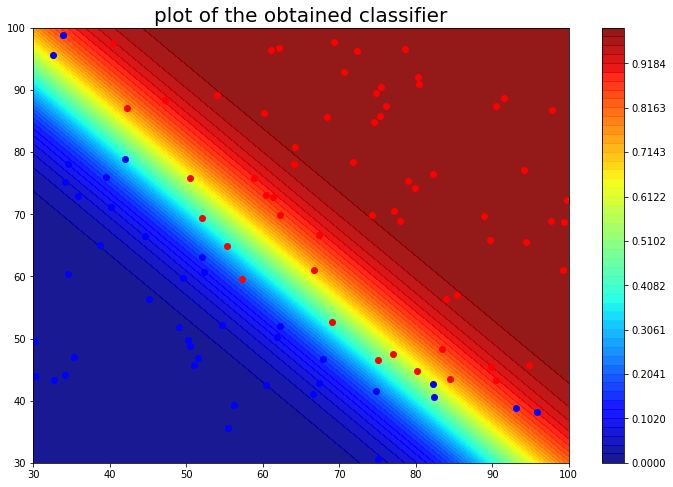

In [15]:
# scatter plot of data with different colors for each label

plt.figure(figsize=(12, 8))
plt.plot(label_0.x, label_0.y, 'bo')
plt.plot(label_1.x, label_1.y, 'ro')
plt.xlim((30, 100))
plt.ylim((30, 100))
plt.contourf(x_grid, y_grid,
             sigmoid_grid,
             levels = np.linspace(sigmoid_grid.reshape(-1, 1).min(), sigmoid_grid.reshape(-1, 1).max(), 50),
             cmap = 'jet',
             alpha = 0.9)
plt.colorbar()
plt.title('plot of the obtained classifier', fontsize=20)
plt.show()

#### version 2 colormap = coolwarm

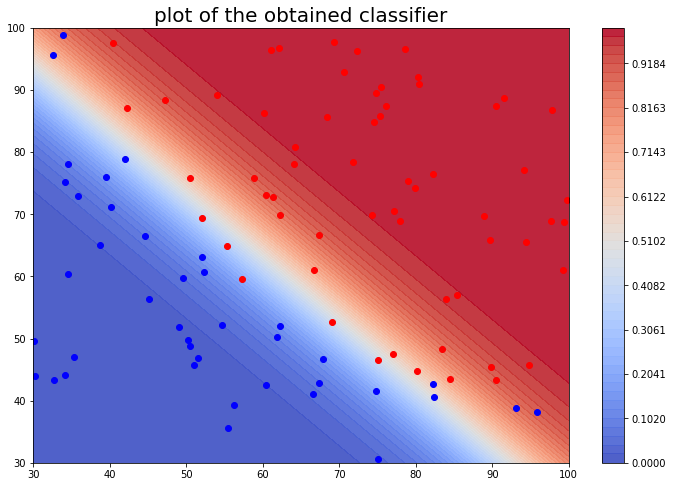

In [16]:
# scatter plot of data with different colors for each label

plt.figure(figsize=(12, 8))
plt.plot(label_0.x, label_0.y, 'bo')
plt.plot(label_1.x, label_1.y, 'ro')
plt.xlim((30, 100))
plt.ylim((30, 100))
plt.contourf(x_grid, y_grid,
             sigmoid_grid,
             levels = np.linspace(sigmoid_grid.reshape(-1, 1).min(), sigmoid_grid.reshape(-1, 1).max(), 50),
             cmap = 'coolwarm',
             alpha = 0.9)
plt.colorbar()
plt.title('plot of the obtained classifier', fontsize=20)
plt.show()

수업시간엔 파란색-초록색-빨간색을 색깔 배경의 예시로 들어서 가장 비슷한 colormap인 jet을 이용하여 그래프를 출력해보았습니다.

또한 1번째 그래프가 색깔이 진해서 보기가 살짝 불편하여 파란색-하얀색-빨간색 색깔 배경인 coolwarm을 이용하여 그래프를 출력해보았습니다.

위의 그래프를 통해 임곗값에 따라 두 집단을 구분하는 구분선이 표본공간 상에서 어떻게 위치하는지를 확인할 수 있습니다. 대부분의 데이터가 점의 색깔과 배경의 색깔이 같게 위치해있지만, 어떤 점은 배경과 색이 맞지 않는 것을 확인할 수 있습니다.

이는 로지스틱 회귀 모델이 성공적으로 분류해내지 못한 데이터로, 오분류 데이터입니다. 학습 과정에서도 최종 정확도가 89%인걸 확인했듯이, 그래프에서도 오분류된 점을 확인할 수 있습니다.

제일 처음에 출력했던 scatter plot을 토대로 추론해보자면 로지스틱 회귀를 사용하면서 정확도를 더 올리기 위해서 x와 y의 다항식 항(ex. $x^2, y^2, x*y$)을 변수로 추가하는 방법을 고려해볼 수 있을 것 같습니다.